In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv('data/surveitera.csv')

In [6]:
# Membersihkan data dari nilai yang hilang
data_cleaned = data.dropna()

In [8]:
print(data_cleaned.columns)

Index(['Timestamp', '1. Nama', '2. Pekerjaan', '3. Asal Instansi', '4. Email',
       '5. Nomor Handphone', '6. Alamat',
       '6.1  Kemana biasanya Anda pergi sehari-hari?',
       '7. Apakah Anda pergi dari rumah ke tempat tujuan?',
       '8. Jika tidak, dari mana Anda berangkat menuju tempat tujuan?',
       '9.Transportasi apa yang Anda gunakan untuk menuju lokasi anda bepergian?',
       '10. Berapa banyak penumpang yang ada di transportasi yang Anda pakai?',
       '11. Apa saja jenis peralatan elektronik yang Anda gunakan sehari hari? ',
       '11.1. Berapa lama (jam) perkiraan penggunaan Handphone sehari hari?\n',
       '11.2. Berapa lama (jam) perkiraan penggunaan Laptop / Komputer sehari hari?',
       '11.3. Berapa lama (jam) perkiraan penggunaan Tablet sehari hari\n',
       '11.4. Berapa lama (jam) perkiraan penggunaan peralatan elektronik lainnya \n',
       '12. Apakah ada benda pendukung yang sering Anda pakai selama ini? (dapat memilih lebih dari satu)',
       '13

In [10]:
# Simpan data yang telah dibersihkan ke folder data olahan
data_cleaned.to_csv('data/cleaned_data.csv', index=False)

In [11]:
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Menyimpan set data
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

In [14]:
# Define the columns for clustering based on available numeric data
clustering_columns = [
    '11.1. Berapa lama (jam) perkiraan penggunaan Handphone sehari hari?\n',
    '11.2. Berapa lama (jam) perkiraan penggunaan Laptop / Komputer sehari hari?',
    '11.3. Berapa lama (jam) perkiraan penggunaan Tablet sehari hari\n',
    '11.4. Berapa lama (jam) perkiraan penggunaan peralatan elektronik lainnya \n'
]

# Verify if the columns are in the DataFrame
for col in clustering_columns:
    if col not in train_data.columns:
        print(f"Column '{col}' not found in the train_data.")

# Assuming the columns exist, proceed with clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_data[clustering_columns])

# Save the trained model
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


ValueError: could not convert string to float: '> 6'

In [15]:
# Inspect the data in the clustering columns to identify non-numeric values
print(train_data[clustering_columns].head())


   11.1. Berapa lama (jam) perkiraan penggunaan Handphone sehari hari?\n  \
76                                                  5                      
67                                                > 6                      
17                                                > 6                      
37                                                > 6                      
13                                                  6                      

   11.2. Berapa lama (jam) perkiraan penggunaan Laptop / Komputer sehari hari?  \
76                                                  1                            
67                                                  1                            
17                                                  5                            
37                                                  3                            
13                                                  5                            

   11.3. Berapa lama (jam) perkiraan penggunaan Ta

In [16]:
# Function to handle '>' or '<' in numeric values and convert them to numbers
def convert_to_numeric(value):
    if isinstance(value, str):
        if '>' in value:
            return float(value.split('>')[1].strip())  # Extract number after '>'
        elif '<' in value:
            return float(value.split('<')[1].strip())  # Extract number after '<'
    try:
        return float(value)
    except:
        return np.nan  # Return NaN if it cannot be converted

# Apply the conversion to the relevant columns
for col in clustering_columns:
    train_data[col] = train_data[col].apply(convert_to_numeric)


In [17]:
# Fill missing values with the mean of each column
train_data[clustering_columns] = train_data[clustering_columns].fillna(train_data[clustering_columns].mean())


In [18]:
kmeans.fit(train_data[clustering_columns])
print("Cluster Centers:", kmeans.cluster_centers_)


Cluster Centers: [[3.38461538 2.23076923 1.76923077 2.        ]
 [5.66666667 4.41666667 3.75       4.66666667]
 [5.66666667 2.61904762 1.0952381  1.61904762]]


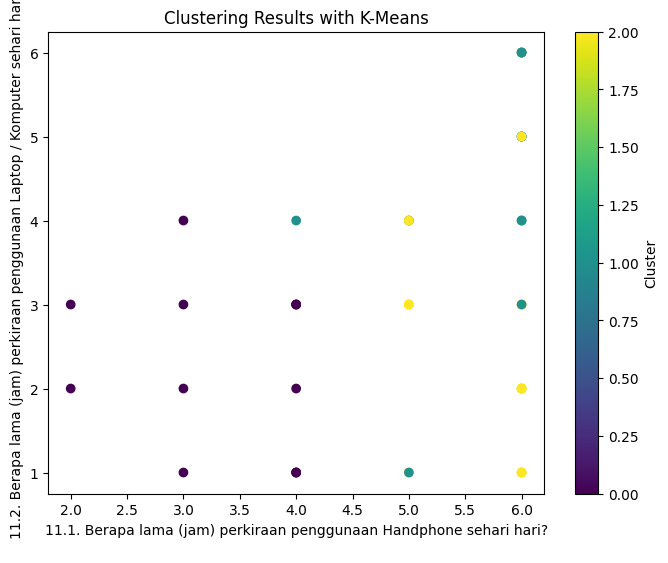

In [20]:
import matplotlib.pyplot as plt

# Menambahkan kolom 'Cluster' yang berisi hasil klasteran
train_data['Cluster'] = kmeans.labels_

# Visualisasi dengan scatter plot (hanya untuk 2 dimensi)
plt.figure(figsize=(8, 6))
plt.scatter(train_data[clustering_columns[0]], train_data[clustering_columns[1]], c=train_data['Cluster'], cmap='viridis')
plt.xlabel(clustering_columns[0])
plt.ylabel(clustering_columns[1])
plt.title('Clustering Results with K-Means')
plt.colorbar(label='Cluster')
plt.show()


In [21]:
import joblib

# Simpan model ke file
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [22]:
from sklearn.metrics import silhouette_score

# Hitung silhouette score
sil_score = silhouette_score(train_data[clustering_columns], kmeans.labels_)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.27616081535779385


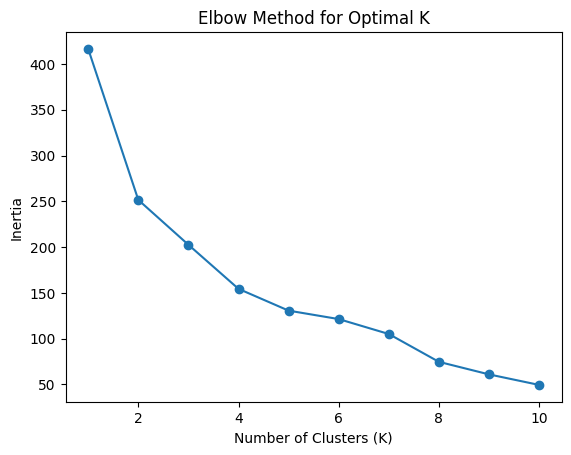

In [23]:
# Menggunakan Elbow Method untuk menemukan jumlah klaster terbaik
inertia = []
for k in range(1, 11):  # Mencoba 1 hingga 10 klaster
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(train_data[clustering_columns])
    inertia.append(kmeans_temp.inertia_)

# Plot inertia untuk menentukan titik elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()
